Praktikum Digitale Signalverarbeitung
=====================================

**Author:** Johann-Markus Batke

**Date:** <2024-05-21 Di>



PROPERTY: header-args:jupyter-python  :session /jpy::494409c787441881e238f8133f5c6c3748ca352a1ab08d68 :kernel p310



## Einleitung



Bilder lassen sich wie Audiosignale digital darstellen. Während Audiosignale eindimensionale Zeitsignale sind, stellen Bilder ein zweidimensionales Signal dar (in zeitlicher Abfolge als Film ebenfalls ein Zeitsignal). Dieser Versuch soll den Umgang mit digitalen Bilddaten grundlegend darstellen. 



## Vorbereitung



Bringen Sie ein Bild bzw. eine Bilddatei Ihrer Wahl zum Praktikumstermin mit. Mit dieser Bilddatei sollen alle Verarbeitungsschritte des Versuchs nachvollzogen und die Aufgabe zum Schluss gelöst werden.



In [60]:
# bild var setzen
bild = "PSD5.png"

## Versuchsdurchführung



Numerical Python und Matplotlib laden:



In [61]:
#bibliotheken importieren

import numpy as np
import matplotlib.pyplot as plt



Zur Demonstration der Programmbeispiele müssen wir ein Beispielbild laden:



In [62]:
from scipy import misc
f = misc.face()

C:\Users\renti\AppData\Local\Temp\ipykernel_1436\1346554487.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


### Bilddaten lesen und schreiben



Nachfolgend wird das Modul `imagio` verwendet.

Das Speichern von Bildern erfolgt durch



In [63]:
import imageio.v3 as iio
iio.imwrite('face.png', f) # uses the Image module (PIL)


Das Lesen von Bildern erfolgt durch



In [64]:
#bild einlesen

im_MN    = iio.imread('face.png')

bildRead = iio.imread(bild)

**Fragen**

1.  Welche Ausgabe ergibt das Attribut `shape` für die Bildvariable `im_MN`?




das Attribut `shape` für die bildvariable im_MN ergibt:  

In [65]:
shape     = im_MN.shape
print(shape)


(768, 1024, 3)


2.  Welche Bedeutung haben die Zahlen?

Die drei Zahlen haben die Bedeutung:

768  = Höhe

1024 = Breite

3    = Channel

### Schwellwert



Die Farbdarstellung erfolgt mit dem Datentyp `uint8`. Alle Farbwerte unterhalb eines Schwellwerts $S$ sollen null gesetzt werden. Zum Vergleich der Bilder sollen die Bilddaten kopiert werden.



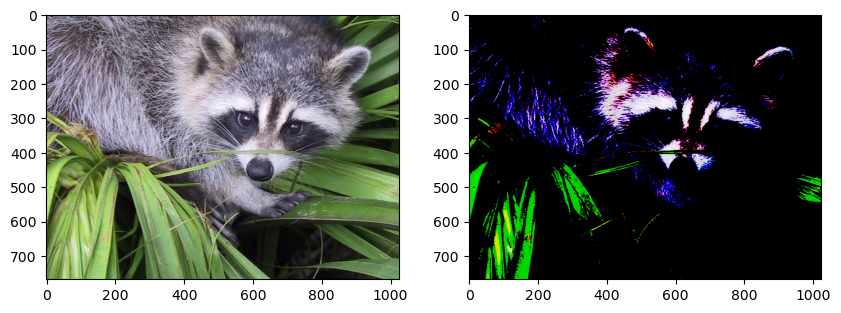

In [66]:
jm_MN = np.copy(im_MN)
jm_MN[im_MN < 200] = 0

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(im_MN)
ax[1].imshow(jm_MN)

**Frage**
Bei welchem Schwellwert ist die Mitte des Wertebereichs erreicht?



Der Wertebereich von `uint8` geht von 0 bis 255. Demnach ist die Mitte des Wertebereichs bei 127,5 erreicht.


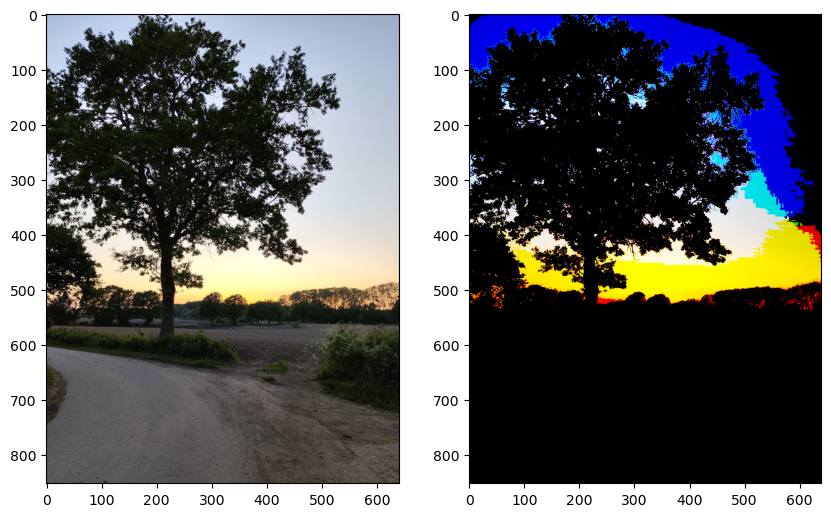

In [67]:
bildFarb = np.copy(bildRead) # Kopie des Bildes erstellen
bildFarb[bildRead < 220] = 0 # alle werte, die kleiner als 220 sind, auf 0 setzen


# Bilder anzeigen
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(bildRead)
ax[1].imshow(bildFarb)

### Faltung



Die Faltung zweier Bilder erfolgt zweidimensional. Dafür steht das Modul `ndimage` zur Verfügung. Im Beispielprogramm wird mit der quadratischen Matrix `mean_LL` gefaltet.



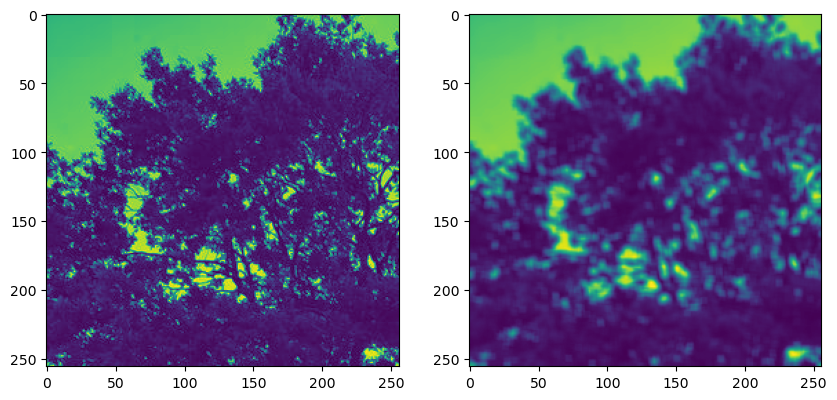

In [68]:
import scipy.ndimage as ndimage
N = 256
f_NN = bildRead[:N, :N, 0] # farbkanal einstellen
F_NN = np.fft.fft2(f_NN) # fouriertransformation

L = 5
mean_LL = np.ones([L, L])/L**2 # mittelwertfilter

# bild filtern
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(f_NN)
ax[1].imshow(ndimage.convolve(f_NN, mean_LL)) #faltung

**Frage**
Welche Wirkung hat die Faltung?



Es entsteht eine Unschärfe im Bild.

### FFT



Die FFT wird zweidimensional berechnet per `fft2`. Der Gleichanteil im Ergebnis der Berechnung steht in Koordinate $(0,0)$. Der Befehl `fftshift` schiebt die Frequenz Null in die Mitte des Bildes.



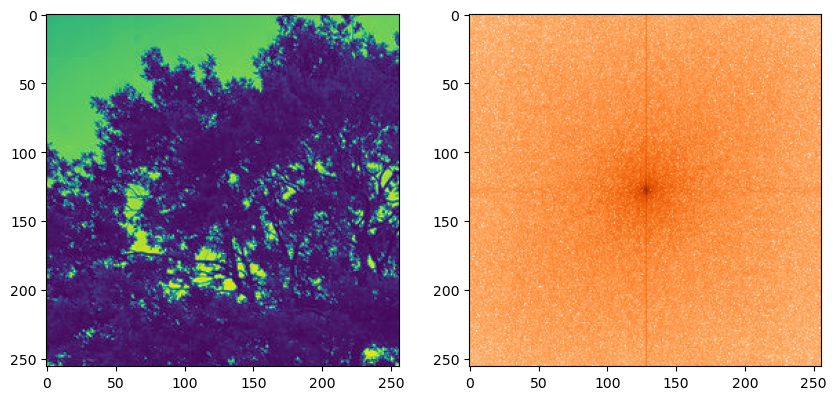

In [69]:

# fouriertransformierte des gefilterten bildes
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(f_NN)
ax[1].imshow(20*np.log(np.abs(np.fft.fftshift(F_NN))), cmap='Oranges')

**Aufgabe** 
Berechnen Sie das Ergebnis der Faltung per FFT!



In [70]:
import scipy.signal as sig

#beispiel für eine faltung per fft mit scipy
FFT_FALT= sig.fftconvolve(f_NN, mean_LL, mode='same')


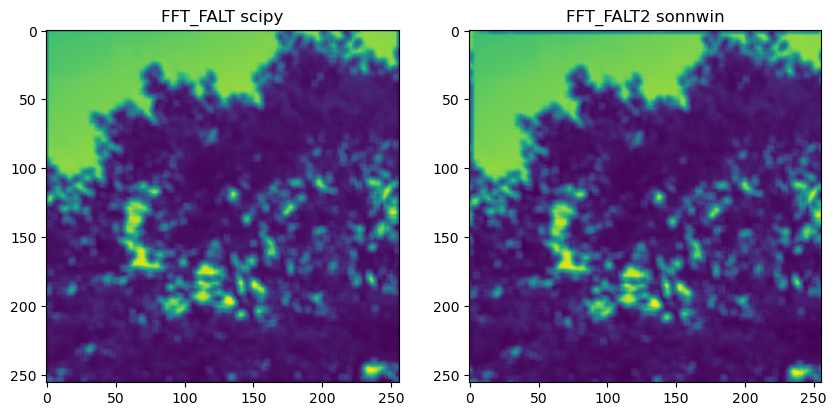

In [71]:
#faltung per fft selbst schreiben
f_NN_fft    = np.fft.fft2(f_NN)
mean_LL_fft = np.fft.fft2(mean_LL, s=f_NN.shape) # s = shape um die größe der filtermaske anzupassen

FFT_FALT2 = f_NN_fft * mean_LL_fft # elementweise multiplikation der fft entspricht faltung im zeitbereich 


# bilder anzeigen
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(FFT_FALT)  #scipy fft faltung
ax[0].title.set_text('FFT_FALT scipy')
ax[1].imshow(np.real(np.fft.ifft2(FFT_FALT2)))
ax[1].title.set_text('FFT_FALT2 sonnwin') # eigene fft faltung



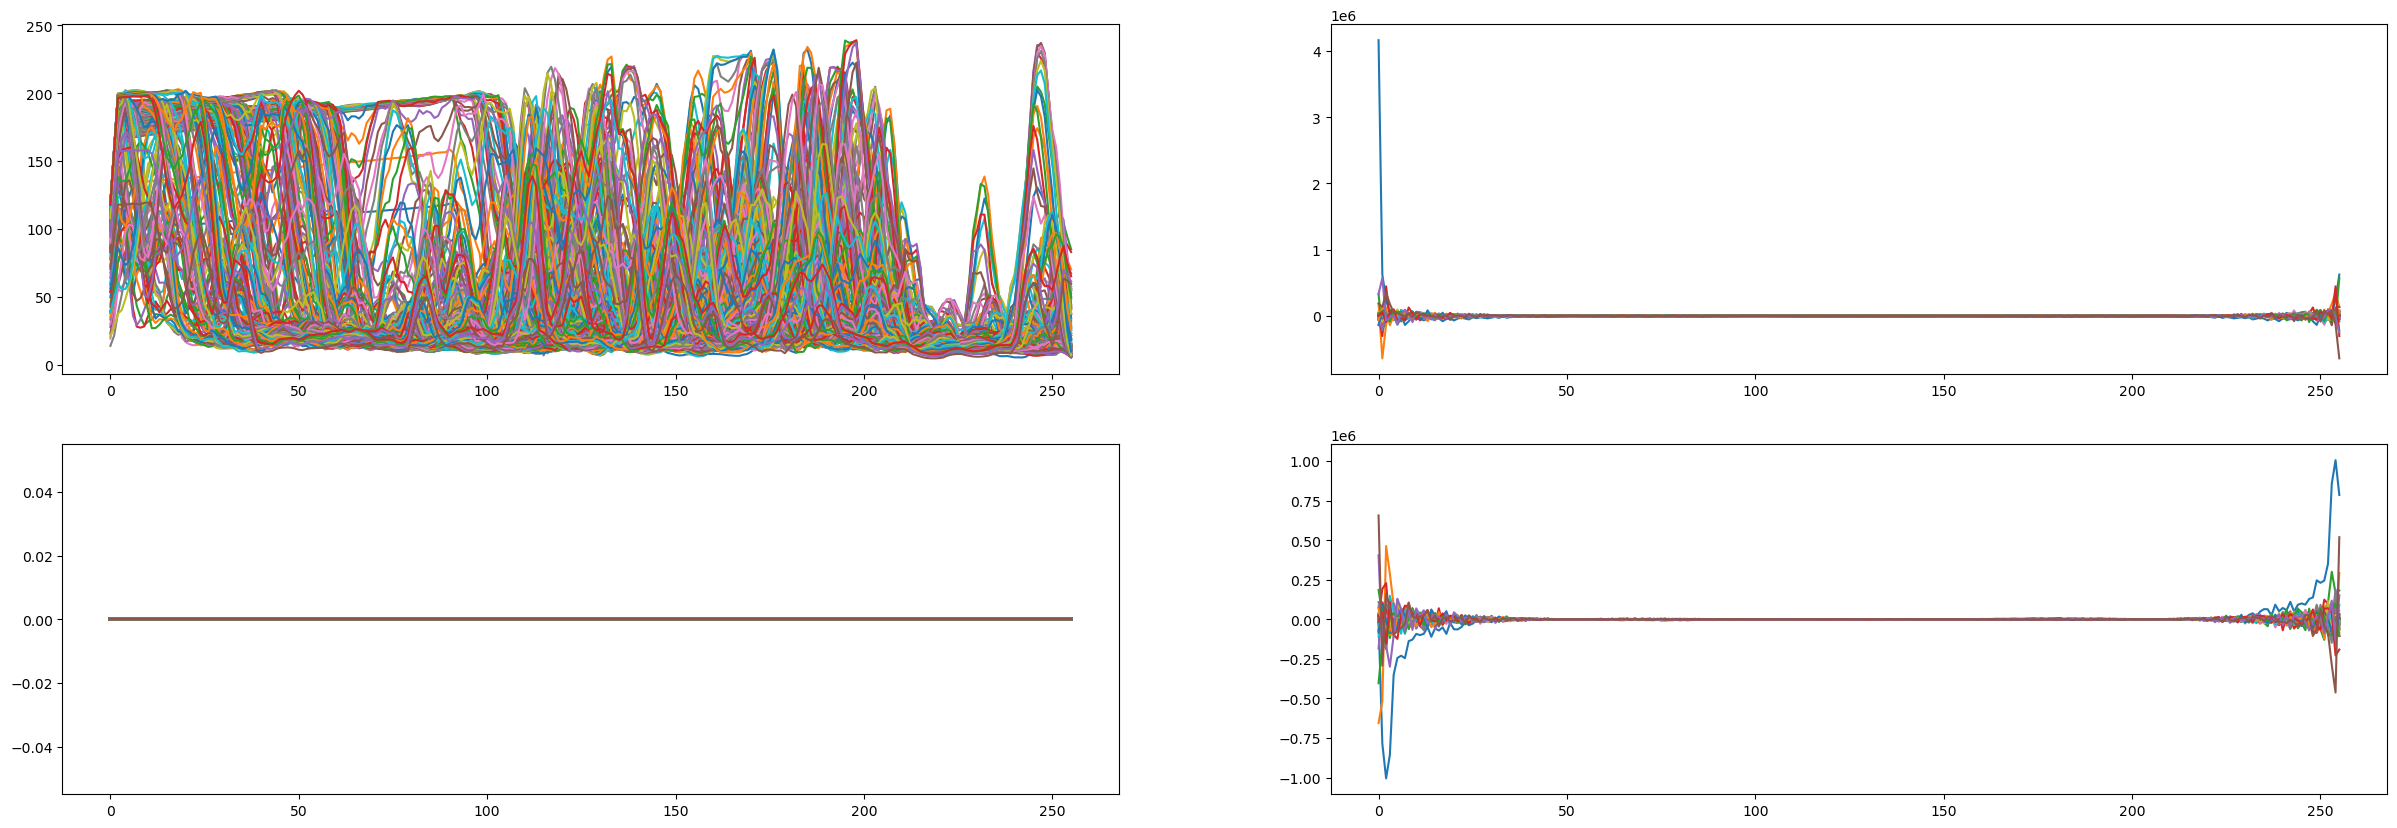

In [72]:
fig, ax = plt.subplots(2,2,figsize=(30,10))
ax[0,0].plot(FFT_FALT.real)
ax[1,0].plot(FFT_FALT.imag)
ax[0,1].plot(FFT_FALT2.real)
ax[1,1].plot(FFT_FALT2.imag)